# Premier League Stats Prediction Regression

This analysis involves a data set from players in the year 2020, and their all-time statistics while playing in the Premier League.
This includes players from all positions, and our purpose is to find a correlation between two or more variables on this dataset.
We'll be analyzing Premier League data and finding the best way to predict players stats using Machine Learning algorithms

Variables we'll test too see if there is correlation between them:

### Players:
Appearances vs Wins: Logically, the more games, the more wins a player COULD HAVE. The number of games sets an upper bound the number of wins because a player cannot have more wins than games. We'll see if gradient descent can make a prediction model between these two variables

### Goalkeepers:
Saves vs Clean Sheets: 
Clean sheet definition: Goalkeeper completes 1 game conceding 0 goals


Although the number of saves does not set an upper bound on the clean sheets, there could be a correlation between the goalkeepers with the best performance, most likely indicating that the more saves a goalkeeper makes, the more clean sheets predicted

# Data Retrieval, Analysis and Visualization

Libraries we're importing from Python for data retrieval, analysis and visualization

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [117]:
# This is done such that anyone accesing this document can access the Premier League data table
import os
soccerpath = os.getcwd()
soccerpath = soccerpath + r'\\datasets\\soccer_data.csv'

In [34]:
df_soccer = pd.read_csv(soccerpath)

In [35]:
df_soccer

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


Now that we have obtained the data, let's make a visualization of the apperances vs wins columns to see how the scatterplot looks like

In [36]:
df_soccer.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

Text(0, 0.5, 'Wins')

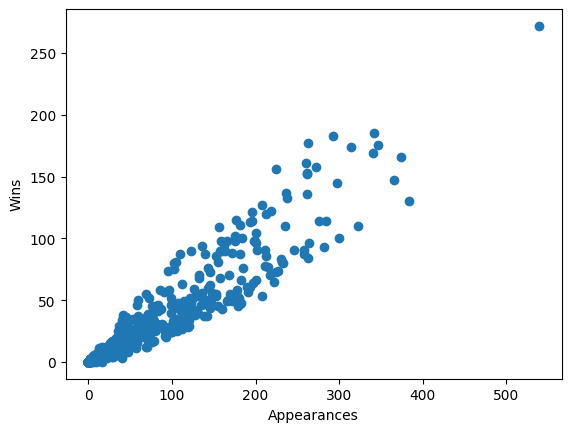

In [123]:
plot = plt.scatter(df_soccer['Appearances'], df_soccer['Wins'])
plt.xlabel('Appearances')
plt.ylabel('Wins')

## Gradient Descent Algorithm

Let's use the gradient descent machine learning algorithm to make a prediction of this scatterplot

Overview of the math we're translating into Python code to find the line of best fit using a ML Algorithm

For the Least Squares Error we'll use:
$$ \sum_{i=1}^{m}(f(x_i) - y_i)^2 $$
where $f(x_i)$ represents the prediction model we're going to use in the form 
$$ f(x_i) = wx_i + b $$
, and $y_i$ each of the data points form the original data_set

The cost function we're going to use is the same as Mean Squared Error (MST):
 $$ J(x) = \frac{1}{2m} \sum_{i=1}^{m}(f(x_i) - y_i)^2 $$

We'll denote it terms of w and b in order to find the gradients of J with respect to w and b:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}((wx_i + b) - y_i)^2 $$

$$ 
\frac{\partial}{\partial{w}} J(w,b) = 2 * \frac{1}{2m} \sum_{i=1}^{m}((wx_i + b) - y_i)^{2-1} * x_i
$$
Thus by taking the partial derivative, we end up with the gradient of J with respect to W
$$
\frac{\partial}{\partial{w}} J(w,b) = \frac{1}{m} \sum_{i=1}^{m}((wx_i + b) - y_i) * x_i
$$

Same logic with the gradient of J with respect to b and we end up with:

$$ 
\frac{\partial}{\partial{b}} J(w,b) = 2 * \frac{1}{2m} \sum_{i=1}^{m}((wx_i + b) - y_i)^{2-1}* 1
$$
$$
\frac{\partial}{\partial{b}} J(w,b) = \frac{1}{m} \sum_{i=1}^{m}((wx_i + b) - y_i)
$$

We'll translate these gradients into Python code to make it simpler, and we'll compute a function that plugs in the data values and computes the gradient given a value for w and b. Our goal is to minimize this gradient as much as possible

In [47]:
def compute_gradient(x_input, y_input, w_input, b_input):
    m = x_input.size
    w_sq = 0
    b_sq = 0
    # Adding the sums in the partial of w and b
    for i in range(m):
        # Partial w of J
        w_sq = w_sq + ((w_input * x_input[i] + b_input) - y_input[i]) * x_input[i]
        # Partial b of J 
        b_sq = b_sq + ((w_input * x_input[i] + b_input) - y_input[i]) 
    
    w_grad = (1/m) * w_sq
    b_grad = (1/m) * b_sq

    return w_grad, b_grad

Now, the next step is to run the gradient descent algorithm by choosing a value for the learning rate.
We'll write a function for the gradient descent algorithm now that we have the gradient of w and b

In [48]:
def gradient_descent(x_input, y_input, w_input, b_input, alpha, i):
    w = w_input
    b = b_input
    for j in range(i):
        w_grad, b_grad = compute_gradient(x_input, y_input, w, b)
        w = w - alpha * w_grad
        b = b - alpha * b_grad
    return w,b      

Let's run the gradient descent algorithm by choosing a value for the learning rate/alpha, and iterations.
We'll choose alpha = 0.01 and i = 10000

In [49]:
w_in, b_in, learning_rate, iterations =  0, 0, 0.01, 1000
gradient_descent(df_soccer['Appearances'], df_soccer['Wins'], w_in, b_in, learning_rate, iterations)

KeyboardInterrupt: 

As you can see, the alpha above is WAY TOO BIG and causes the gradient to overflow, let's choose alpha = 0.0001 to see if it is a right fit for 1000 iterations

In [121]:
w_in, b_in, learning_rate, iterations =  0, 0, 0.0001, 1000
pred_w, pred_b = gradient_descent(df_soccer['Appearances'], df_soccer['Wins'], w_in, b_in, learning_rate, iterations)
print(f'w = {pred_w}, b = {pred_b}')

w = 0.4375605166961902, b = -0.10557696213412954


We obtain w = 0.4375605166961902, b - -0.10557696213412954
Let's draw the scatterplot and compare to this line to see if it fits the data

# Players: Games vs Wins correlation

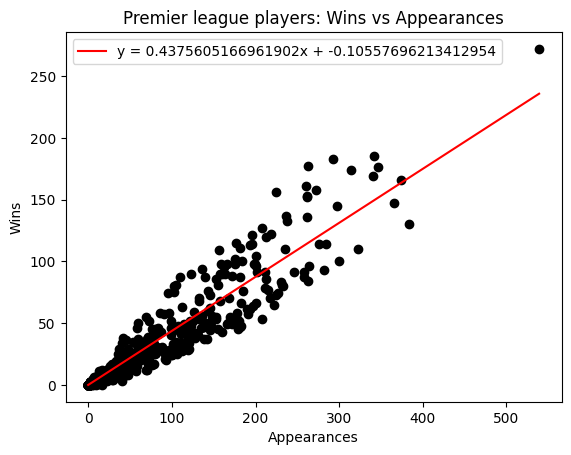

In [122]:
plt.scatter(df_soccer['Appearances'], df_soccer['Wins'], c = 'black')
#Sets a domain for the y (Not values itself)
domain = np.linspace(min(df_soccer['Appearances']), max(df_soccer['Appearances']), 100)

#Regression we found by using gradient descent
pred_output = pred_w * domain + pred_b
plt.plot(domain, pred_output, color = 'red', label = f'y = {pred_w}x + {pred_b}')

plt.xlabel('Appearances')
plt.ylabel('Wins')
plt.title('Premier league players: Wins vs Appearances')
plt.legend()
plt.show()

Thus, we can use the regression model to predict wins of players given how much matches they have played

Let's seek another relationship between the statistics of these players

In [63]:
df_soccer.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

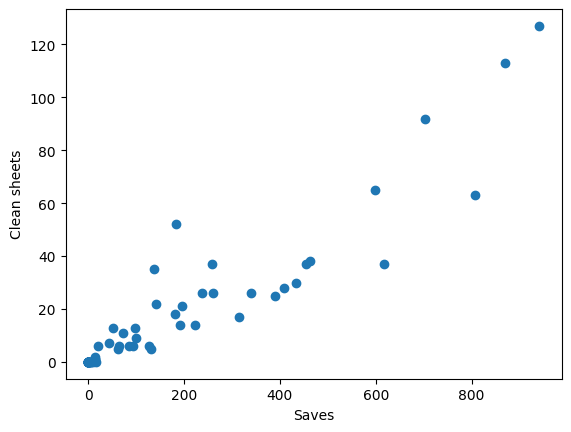

In [124]:
plt.scatter(df_soccer['Saves'], df_soccer['Clean sheets'])
plt.xlabel('Saves')
plt.ylabel('Clean sheets')
plt.show()

We can see there could be a linear correlation between the amount of saves of a player (Goalkeepers mostly), and the clean sheets
Let's clean up the data and ONLY INCLUDE the players that play their position goalkeepers

In [107]:
df_keeper = df_soccer[df_soccer['Position'] == 'Goalkeeper']
df_keeper[['Saves', 'Clean sheets']]
df_keeper['Clean sheets'].dtype
df_keeper


dtype('float64')

In [96]:
df_keeper = df_keeper.dropna(subset=['Saves', 'Clean sheets'])

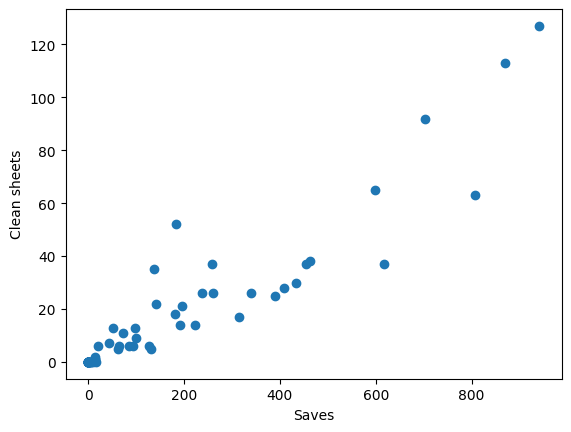

In [125]:
plt.scatter(df_keeper['Saves'], df_keeper['Clean sheets'])
plt.xlabel('Saves')
plt.ylabel('Clean sheets')
plt.show()

Now that we have implemented the function for gradient descent, let's find a regression between these amount of saves and the number of clean sheets of a goalkeeper
We'll use the member of pd 'values' to prevent any errors when indexing in the columns

In [111]:
w2_in, b2_in, learning_rate2, iterations2 =  0, 0, 0.00001, 10000
pred_w2, pred_b2 = gradient_descent(df_keeper['Saves'].values, df_keeper['Clean sheets'].values, w2_in, b2_in, learning_rate2, iterations2)
print(f'w = {pred_w2}, b = {pred_b2}')

w = 0.10404916529048341, b = -0.02748054569761876


# Goalkeepers: Saves vs Clean Sheets

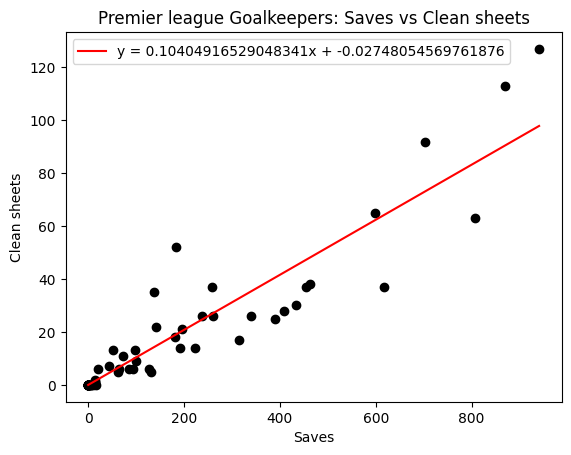

In [119]:
plt.scatter(df_keeper['Saves'].values, df_keeper['Clean sheets'].values, c = 'black')
#Sets a domain for the y (Not values itself)
domain2 = np.linspace(min(df_keeper['Saves'].values), max(df_keeper['Saves'].values), 100)

#Regression we found by using gradient descent
pred_output2 = pred_w2 * domain2 + pred_b2
plt.plot(domain2, pred_output2, color = 'red', label = f'y = {pred_w2}x + {pred_b2}')

plt.xlabel('Saves')
plt.ylabel('Clean sheets')
plt.title('Premier league Goalkeepers: Saves vs Clean sheets')
plt.legend()
plt.show()

We can see a line of best fit that predicts the number of clean sheets of a goalkeeper in the Premier League given their number of saves